# Peramalan Data Kurs Jual Rupiah dengan USD menggunakan metode Deep Learning RNN

## Library

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, LSTM, GRU
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from sklearn.metrics import mean_absolute_percentage_error

## Pra Analisis

Data yang digunakan merupakan data time series periode mingguan dari tanggal **14 Juni 2020** hingga **29 Oktober 2023** untuk data kurs jual  (kurs jual) Rupiah terhadap USD. Data nilai kurs jual Rupiah terhadap USD merupakan data sekunder yang diambil dari website https://www.bi.go.id/id/statistik/informasi-kurs.


In [ ]:

df = pd.read_csv("https://raw.githubusercontent.com/imomenujung/MPDW/main/Tugas%20Akhir/data176.csv", sep=",")
df.head()


,Week,Average_Kurs
0,2020-06-14,14280.0
1,2020-06-21,14291.8
2,2020-06-28,14491.2
3,2020-07-05,14554.4
4,2020-07-12,14678.2


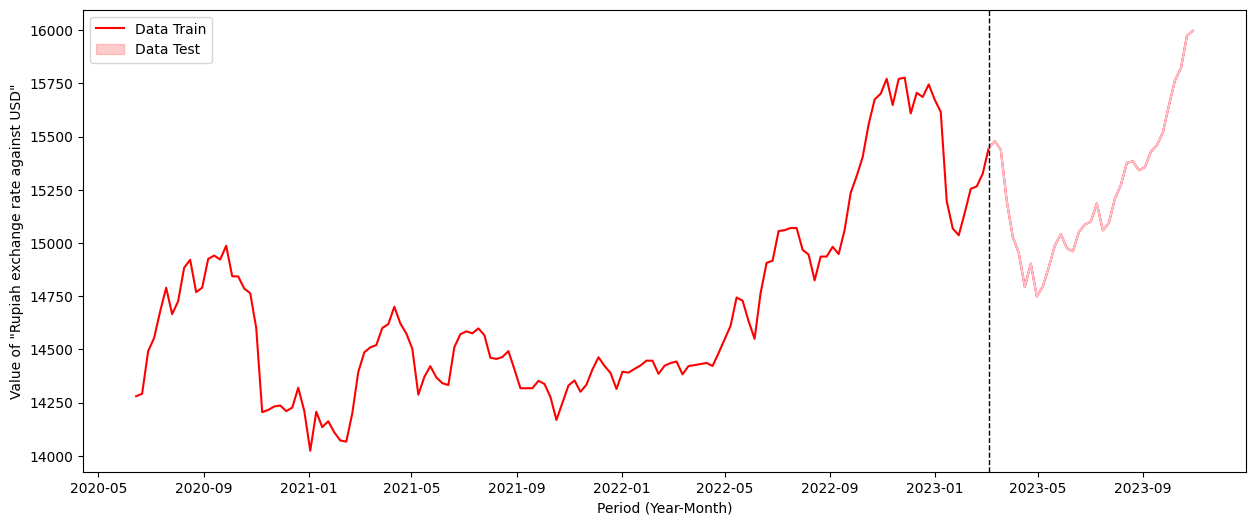

In [ ]:
df_train = df
df_test = df.tail(int(0.2 * len(df)))
from datetime import datetime, date
import seaborn as sns

df['Week'] = pd.to_datetime(df['Week'], format = '%Y-%m-%d')
df.head().style.set_properties(subset=['Week'], **{'background-color': 'dodgerblue'})
ax = plt.figure(figsize=(15, 6))
sns.lineplot(x=df['Week'], y=df_train['Average_Kurs'].fillna(method='ffill'), color='red')
sns.lineplot(x=df['Week'], y=df_test['Average_Kurs'].fillna(method='ffill'), color='pink')
plt.xlabel('Period (Year-Month)')
plt.ylabel('Value of "Rupiah exchange rate against USD"')
plt.legend(labels=['Data Train', 'Data Test'])
# Define the x-coordinate where you want the vertical line
x_coord = pd.to_datetime("2023-03-05")

# Add the vertical line using axvline
plt.axvline(x=x_coord, color='black', linestyle='--', linewidth=1)

# Show the plot
plt.show()

### Split data menjadi data latih dan data uji
**Pilih Salah satu sesuai kebutuhan**

#### 1. Split dengan Persentase

In [ ]:
def get_train_test(url, split_percent=0.8):
    global scaler
    df = pd.read_csv(url)[["Average_Kurs"]]
    data = np.array(df.values.astype('float32'))
    n = len(data)
    # Point for splitting data into train and test
    scaler = MinMaxScaler(feature_range=(0, 1))
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    train_data = scaler.fit_transform(train_data).flatten()
    test_data = scaler.transform(test_data).flatten()

    return train_data, test_data, data

### Fungsi Untuk Input Data ke RNN

In [ ]:
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

### Fungsi RNN (Recurrent Neural Network)

#### 1. Simple RNN

In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape,
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

#### 2. Long Short-Term Memory(LSTM)

In [ ]:
def create_LSTM(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape,
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

#### 3. Gated Recurrent Unit (GRU)

In [ ]:
def create_GRU(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape,
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

### Fungsi Pembuat Plot

In [ ]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Data Train', 'Data Test'])
    plt.xlabel('Period (Week)')
    plt.ylabel('Value of "Rupiah Exchange Rate Against USD"')

### Peramalan

In [ ]:
time_steps = 1 # Setting Jarak antar amatan 1 berarti mingguan, 4 bulanan, 52 tahunan

Epoch 1/100
5/5 - 1s - loss: 0.1564 - 1s/epoch - 206ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1037 - 9ms/epoch - 2ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0671 - 9ms/epoch - 2ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0439 - 9ms/epoch - 2ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0320 - 9ms/epoch - 2ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0268 - 10ms/epoch - 2ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0252 - 9ms/epoch - 2ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0248 - 9ms/epoch - 2ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0240 - 9ms/epoch - 2ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0229 - 10ms/epoch - 2ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0216 - 9ms/epoch - 2ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0204 - 10ms/epoch - 2ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0193 - 9ms/epoch - 2ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0183 - 9ms/epoch - 2ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0174 - 9ms/epoch - 2ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0166 - 10ms/epoch - 2ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0158 - 9ms/e

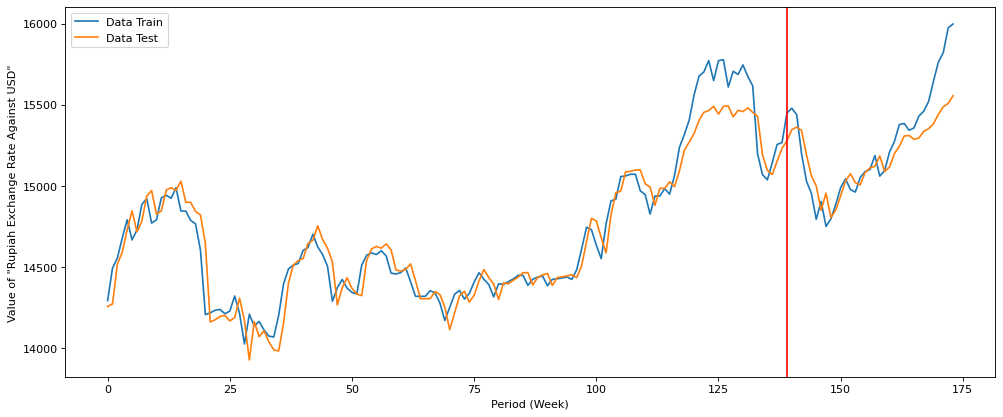

In [ ]:
#EPOCH 100
# Metode = Simple RNN
# Activation = "tanh", pilihannnya : 'tanh','sigmoid','relu'
# Nilai yang dapat diubah : hidden_units=50, epochs=100, batch_size=32,verbose=2
train_data, test_data, data = get_train_test("https://raw.githubusercontent.com/imomenujung/MPDW/main/Tugas%20Akhir/data176.csv",split_percent=0.8)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)
model = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)

MAPE_train_RNN = mean_absolute_percentage_error(scaler.inverse_transform(trainY.reshape(-1,1)), scaler.inverse_transform(train_predict))
MAPE_test_RNN = mean_absolute_percentage_error(scaler.inverse_transform(testY.reshape(-1,1)), scaler.inverse_transform(test_predict.reshape(-1,1)))

print(f"MAPE_train_RNN = {round(MAPE_train_RNN * 100,2)} %")
print(f"MAPE_test_RNN = {round(MAPE_test_RNN * 100,2)} %")

plot_result(scaler.inverse_transform(trainY.reshape(-1,1)), scaler.inverse_transform(testY.reshape(-1,1)), scaler.inverse_transform(train_predict.reshape(-1,1)), scaler.inverse_transform(test_predict.reshape(-1,1)))

Epoch 1/25
5/5 - 1s - loss: 0.1196 - 686ms/epoch - 137ms/step
Epoch 2/25
5/5 - 0s - loss: 0.0811 - 9ms/epoch - 2ms/step
Epoch 3/25
5/5 - 0s - loss: 0.0539 - 10ms/epoch - 2ms/step
Epoch 4/25
5/5 - 0s - loss: 0.0370 - 15ms/epoch - 3ms/step
Epoch 5/25
5/5 - 0s - loss: 0.0269 - 9ms/epoch - 2ms/step
Epoch 6/25
5/5 - 0s - loss: 0.0223 - 9ms/epoch - 2ms/step
Epoch 7/25
5/5 - 0s - loss: 0.0207 - 9ms/epoch - 2ms/step
Epoch 8/25
5/5 - 0s - loss: 0.0197 - 9ms/epoch - 2ms/step
Epoch 9/25
5/5 - 0s - loss: 0.0192 - 12ms/epoch - 2ms/step
Epoch 10/25
5/5 - 0s - loss: 0.0186 - 10ms/epoch - 2ms/step
Epoch 11/25
5/5 - 0s - loss: 0.0177 - 9ms/epoch - 2ms/step
Epoch 12/25
5/5 - 0s - loss: 0.0168 - 9ms/epoch - 2ms/step
Epoch 13/25
5/5 - 0s - loss: 0.0160 - 9ms/epoch - 2ms/step
Epoch 14/25
5/5 - 0s - loss: 0.0151 - 9ms/epoch - 2ms/step
Epoch 15/25
5/5 - 0s - loss: 0.0145 - 9ms/epoch - 2ms/step
Epoch 16/25
5/5 - 0s - loss: 0.0138 - 9ms/epoch - 2ms/step
Epoch 17/25
5/5 - 0s - loss: 0.0132 - 9ms/epoch - 2ms/ste

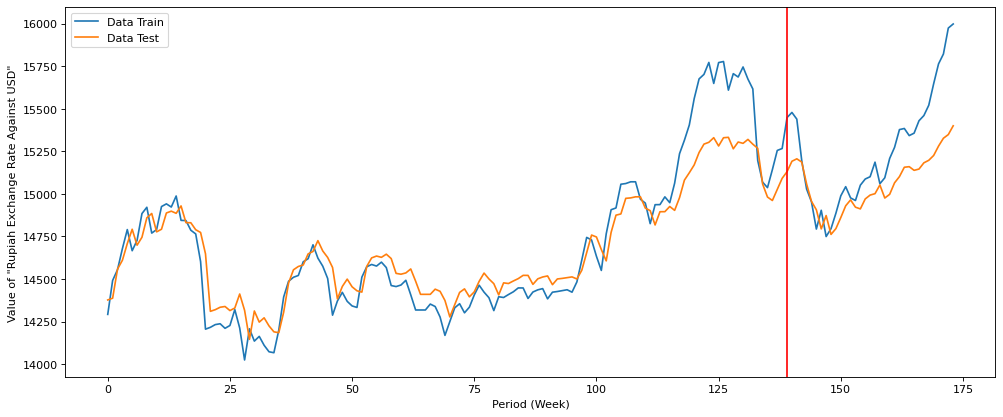

In [ ]:
#EPOCH 25
# Metode = Simple RNN
# Activation = "tanh", pilihannnya : 'tanh','sigmoid','relu'
# Nilai yang dapat diubah : hidden_units=50, epochs=100, batch_size=32,verbose=2
train_data, test_data, data = get_train_test("https://raw.githubusercontent.com/imomenujung/MPDW/main/Tugas%20Akhir/data176.csv",split_percent=0.8)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)
model = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=25, batch_size=32, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)

MAPE_train_RNN = mean_absolute_percentage_error(scaler.inverse_transform(trainY.reshape(-1,1)), scaler.inverse_transform(train_predict))
MAPE_test_RNN = mean_absolute_percentage_error(scaler.inverse_transform(testY.reshape(-1,1)), scaler.inverse_transform(test_predict.reshape(-1,1)))

print(f"MAPE_train_RNN = {round(MAPE_train_RNN * 100,2)} %")
print(f"MAPE_test_RNN = {round(MAPE_test_RNN * 100,2)} %")

plot_result(scaler.inverse_transform(trainY.reshape(-1,1)), scaler.inverse_transform(testY.reshape(-1,1)), scaler.inverse_transform(train_predict.reshape(-1,1)), scaler.inverse_transform(test_predict.reshape(-1,1)))

Epoch 1/75
5/5 - 1s - loss: 0.3528 - 942ms/epoch - 188ms/step
Epoch 2/75
5/5 - 0s - loss: 0.2711 - 12ms/epoch - 2ms/step
Epoch 3/75
5/5 - 0s - loss: 0.2000 - 10ms/epoch - 2ms/step
Epoch 4/75
5/5 - 0s - loss: 0.1461 - 10ms/epoch - 2ms/step
Epoch 5/75
5/5 - 0s - loss: 0.1052 - 9ms/epoch - 2ms/step
Epoch 6/75
5/5 - 0s - loss: 0.0767 - 13ms/epoch - 3ms/step
Epoch 7/75
5/5 - 0s - loss: 0.0603 - 11ms/epoch - 2ms/step
Epoch 8/75
5/5 - 0s - loss: 0.0495 - 9ms/epoch - 2ms/step
Epoch 9/75
5/5 - 0s - loss: 0.0442 - 10ms/epoch - 2ms/step
Epoch 10/75
5/5 - 0s - loss: 0.0413 - 11ms/epoch - 2ms/step
Epoch 11/75
5/5 - 0s - loss: 0.0391 - 11ms/epoch - 2ms/step
Epoch 12/75
5/5 - 0s - loss: 0.0381 - 9ms/epoch - 2ms/step
Epoch 13/75
5/5 - 0s - loss: 0.0366 - 9ms/epoch - 2ms/step
Epoch 14/75
5/5 - 0s - loss: 0.0354 - 9ms/epoch - 2ms/step
Epoch 15/75
5/5 - 0s - loss: 0.0342 - 9ms/epoch - 2ms/step
Epoch 16/75
5/5 - 0s - loss: 0.0328 - 8ms/epoch - 2ms/step
Epoch 17/75
5/5 - 0s - loss: 0.0314 - 8ms/epoch - 2ms

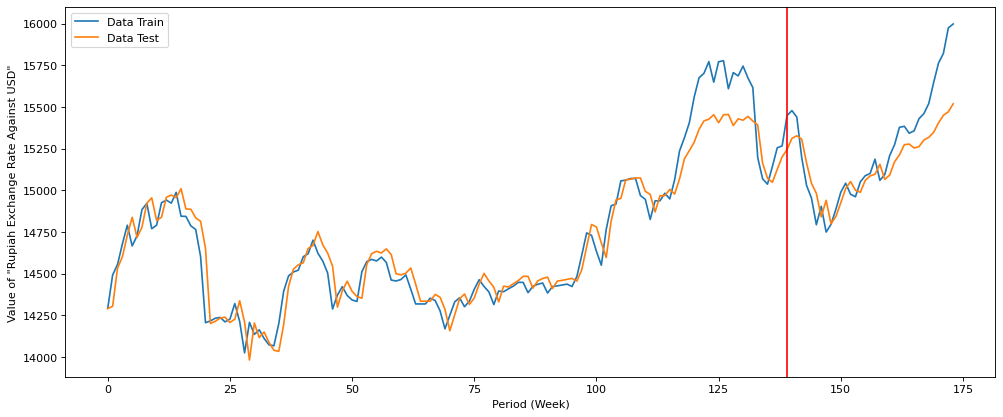

In [ ]:
#EPOCH 75
# Metode = Simple RNN
# Activation = "tanh", pilihannnya : 'tanh','sigmoid','relu'
# Nilai yang dapat diubah : hidden_units=50, epochs=100, batch_size=32,verbose=2
train_data, test_data, data = get_train_test("https://raw.githubusercontent.com/imomenujung/MPDW/main/Tugas%20Akhir/data176.csv",split_percent=0.8)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)
model = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=75, batch_size=32, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)

MAPE_train_RNN = mean_absolute_percentage_error(scaler.inverse_transform(trainY.reshape(-1,1)), scaler.inverse_transform(train_predict))
MAPE_test_RNN = mean_absolute_percentage_error(scaler.inverse_transform(testY.reshape(-1,1)), scaler.inverse_transform(test_predict.reshape(-1,1)))

print(f"MAPE_train_RNN = {round(MAPE_train_RNN * 100,2)} %")
print(f"MAPE_test_RNN = {round(MAPE_test_RNN * 100,2)} %")

plot_result(scaler.inverse_transform(trainY.reshape(-1,1)), scaler.inverse_transform(testY.reshape(-1,1)), scaler.inverse_transform(train_predict.reshape(-1,1)), scaler.inverse_transform(test_predict.reshape(-1,1)))

Epoch 1/50
5/5 - 1s - loss: 0.2487 - 719ms/epoch - 144ms/step
Epoch 2/50
5/5 - 0s - loss: 0.1839 - 10ms/epoch - 2ms/step
Epoch 3/50
5/5 - 0s - loss: 0.1308 - 9ms/epoch - 2ms/step
Epoch 4/50
5/5 - 0s - loss: 0.0932 - 9ms/epoch - 2ms/step
Epoch 5/50
5/5 - 0s - loss: 0.0674 - 9ms/epoch - 2ms/step
Epoch 6/50
5/5 - 0s - loss: 0.0497 - 14ms/epoch - 3ms/step
Epoch 7/50
5/5 - 0s - loss: 0.0402 - 14ms/epoch - 3ms/step
Epoch 8/50
5/5 - 0s - loss: 0.0355 - 14ms/epoch - 3ms/step
Epoch 9/50
5/5 - 0s - loss: 0.0326 - 11ms/epoch - 2ms/step
Epoch 10/50
5/5 - 0s - loss: 0.0313 - 12ms/epoch - 2ms/step
Epoch 11/50
5/5 - 0s - loss: 0.0306 - 10ms/epoch - 2ms/step
Epoch 12/50
5/5 - 0s - loss: 0.0297 - 11ms/epoch - 2ms/step
Epoch 13/50
5/5 - 0s - loss: 0.0287 - 10ms/epoch - 2ms/step
Epoch 14/50
5/5 - 0s - loss: 0.0277 - 10ms/epoch - 2ms/step
Epoch 15/50
5/5 - 0s - loss: 0.0266 - 10ms/epoch - 2ms/step
Epoch 16/50
5/5 - 0s - loss: 0.0255 - 9ms/epoch - 2ms/step
Epoch 17/50
5/5 - 0s - loss: 0.0245 - 10ms/epoch -

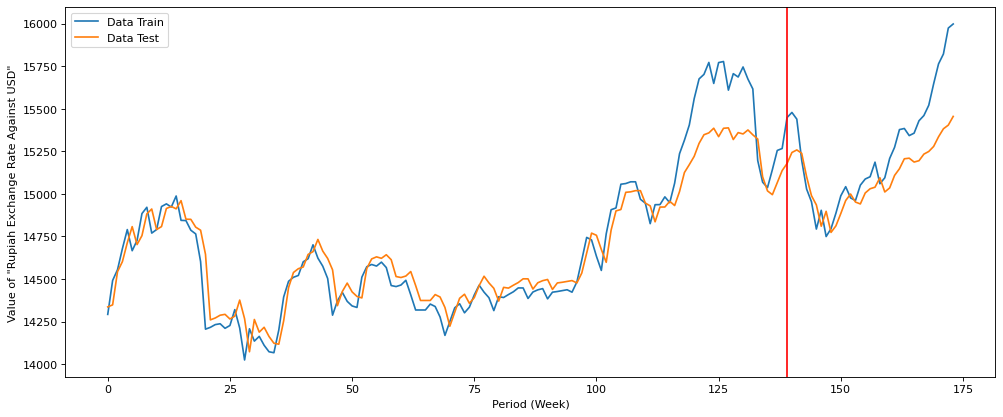

In [ ]:
#EPOCH 50
# Metode = Simple RNN
# Activation = "tanh", pilihannnya : 'tanh','sigmoid','relu'
# Nilai yang dapat diubah : hidden_units=50, epochs=50, batch_size=32,verbose=2
train_data, test_data, data = get_train_test("https://raw.githubusercontent.com/imomenujung/MPDW/main/Tugas%20Akhir/data176.csv",split_percent=0.8)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)
model = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=50, batch_size=32, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)

MAPE_train_RNN = mean_absolute_percentage_error(scaler.inverse_transform(trainY.reshape(-1,1)), scaler.inverse_transform(train_predict))
MAPE_test_RNN = mean_absolute_percentage_error(scaler.inverse_transform(testY.reshape(-1,1)), scaler.inverse_transform(test_predict.reshape(-1,1)))

print(f"MAPE_train_RNN = {round(MAPE_train_RNN * 100,2)} %")
print(f"MAPE_test_RNN = {round(MAPE_test_RNN * 100,2)} %")

plot_result(scaler.inverse_transform(trainY.reshape(-1,1)), scaler.inverse_transform(testY.reshape(-1,1)), scaler.inverse_transform(train_predict.reshape(-1,1)), scaler.inverse_transform(test_predict.reshape(-1,1)))

Epoch 1/25
5/5 - 1s - loss: 0.1937 - 1s/epoch - 280ms/step
Epoch 2/25
5/5 - 0s - loss: 0.1758 - 11ms/epoch - 2ms/step
Epoch 3/25
5/5 - 0s - loss: 0.1599 - 11ms/epoch - 2ms/step
Epoch 4/25
5/5 - 0s - loss: 0.1449 - 11ms/epoch - 2ms/step
Epoch 5/25
5/5 - 0s - loss: 0.1306 - 10ms/epoch - 2ms/step
Epoch 6/25
5/5 - 0s - loss: 0.1169 - 15ms/epoch - 3ms/step
Epoch 7/25
5/5 - 0s - loss: 0.1046 - 10ms/epoch - 2ms/step
Epoch 8/25
5/5 - 0s - loss: 0.0932 - 10ms/epoch - 2ms/step
Epoch 9/25
5/5 - 0s - loss: 0.0833 - 15ms/epoch - 3ms/step
Epoch 10/25
5/5 - 0s - loss: 0.0734 - 12ms/epoch - 2ms/step
Epoch 11/25
5/5 - 0s - loss: 0.0652 - 13ms/epoch - 3ms/step
Epoch 12/25
5/5 - 0s - loss: 0.0581 - 12ms/epoch - 2ms/step
Epoch 13/25
5/5 - 0s - loss: 0.0522 - 11ms/epoch - 2ms/step
Epoch 14/25
5/5 - 0s - loss: 0.0471 - 12ms/epoch - 2ms/step
Epoch 15/25
5/5 - 0s - loss: 0.0432 - 10ms/epoch - 2ms/step
Epoch 16/25
5/5 - 0s - loss: 0.0404 - 10ms/epoch - 2ms/step
Epoch 17/25
5/5 - 0s - loss: 0.0378 - 10ms/epoch 

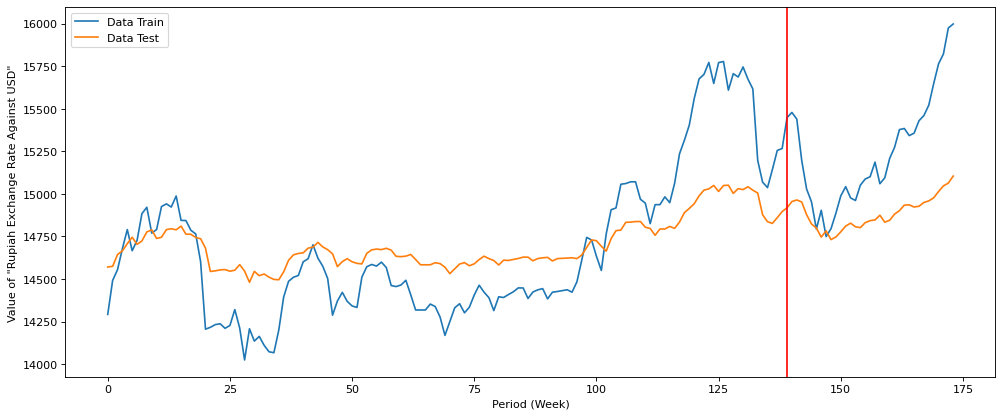

In [ ]:
#EPOCH 25
# Metode = LSTM
# Activation = "tanh", pilihannnya : 'tanh','sigmoid','relu'
# Nilai yang dapat diubah : hidden_units=50, epochs=100, batch_size=32,verbose=2
train_data, test_data, data = get_train_test("https://raw.githubusercontent.com/imomenujung/MPDW/main/Tugas%20Akhir/data176.csv",split_percent=0.8)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)
model = create_LSTM(hidden_units=50, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=25, batch_size=32, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)

MAPE_train_LSTM = mean_absolute_percentage_error(scaler.inverse_transform(trainY.reshape(-1,1)), scaler.inverse_transform(train_predict))
MAPE_test_LSTM = mean_absolute_percentage_error(scaler.inverse_transform(testY.reshape(-1,1)), scaler.inverse_transform(test_predict.reshape(-1,1)))

print(f"MAPE_train_LSTM = {round(MAPE_train_LSTM * 100,2)} %")
print(f"MAPE_test_LSTM = {round(MAPE_test_LSTM * 100,2)} %")

plot_result(scaler.inverse_transform(trainY.reshape(-1,1)), scaler.inverse_transform(testY.reshape(-1,1)), scaler.inverse_transform(train_predict.reshape(-1,1)), scaler.inverse_transform(test_predict.reshape(-1,1)))

Epoch 1/50
5/5 - 1s - loss: 0.2066 - 1s/epoch - 280ms/step
Epoch 2/50
5/5 - 0s - loss: 0.1892 - 14ms/epoch - 3ms/step
Epoch 3/50
5/5 - 0s - loss: 0.1731 - 11ms/epoch - 2ms/step
Epoch 4/50
5/5 - 0s - loss: 0.1580 - 11ms/epoch - 2ms/step
Epoch 5/50
5/5 - 0s - loss: 0.1445 - 12ms/epoch - 2ms/step
Epoch 6/50
5/5 - 0s - loss: 0.1313 - 10ms/epoch - 2ms/step
Epoch 7/50
5/5 - 0s - loss: 0.1187 - 13ms/epoch - 3ms/step
Epoch 8/50
5/5 - 0s - loss: 0.1078 - 13ms/epoch - 3ms/step
Epoch 9/50
5/5 - 0s - loss: 0.0970 - 10ms/epoch - 2ms/step
Epoch 10/50
5/5 - 0s - loss: 0.0874 - 10ms/epoch - 2ms/step
Epoch 11/50
5/5 - 0s - loss: 0.0792 - 10ms/epoch - 2ms/step
Epoch 12/50
5/5 - 0s - loss: 0.0711 - 11ms/epoch - 2ms/step
Epoch 13/50
5/5 - 0s - loss: 0.0642 - 10ms/epoch - 2ms/step
Epoch 14/50
5/5 - 0s - loss: 0.0579 - 11ms/epoch - 2ms/step
Epoch 15/50
5/5 - 0s - loss: 0.0528 - 11ms/epoch - 2ms/step
Epoch 16/50
5/5 - 0s - loss: 0.0481 - 10ms/epoch - 2ms/step
Epoch 17/50
5/5 - 0s - loss: 0.0446 - 11ms/epoch 

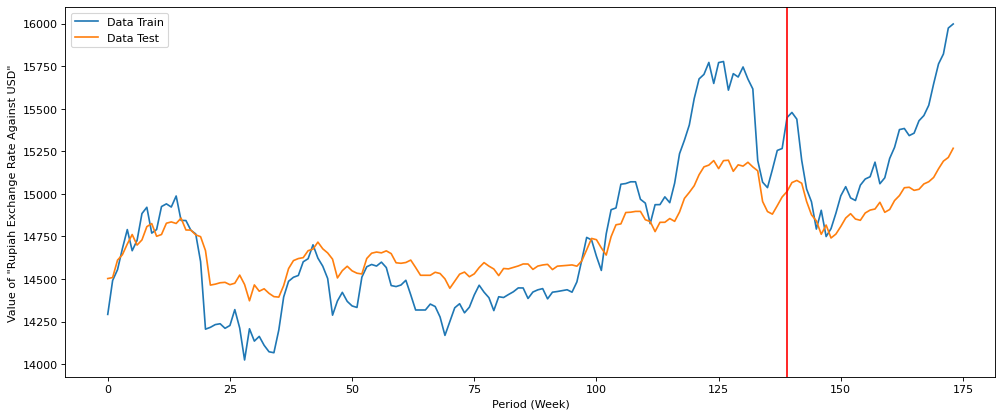

In [ ]:
#EPOCH 50
# Metode = LSTM
# Activation = "tanh", pilihannnya : 'tanh','sigmoid','relu'
# Nilai yang dapat diubah : hidden_units=50, epochs=100, batch_size=32,verbose=2
train_data, test_data, data = get_train_test("https://raw.githubusercontent.com/imomenujung/MPDW/main/Tugas%20Akhir/data176.csv",split_percent=0.8)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)
model = create_LSTM(hidden_units=50, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=50, batch_size=32, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)

MAPE_train_LSTM = mean_absolute_percentage_error(scaler.inverse_transform(trainY.reshape(-1,1)), scaler.inverse_transform(train_predict))
MAPE_test_LSTM = mean_absolute_percentage_error(scaler.inverse_transform(testY.reshape(-1,1)), scaler.inverse_transform(test_predict.reshape(-1,1)))

print(f"MAPE_train_LSTM = {round(MAPE_train_LSTM * 100,2)} %")
print(f"MAPE_test_LSTM = {round(MAPE_test_LSTM * 100,2)} %")

plot_result(scaler.inverse_transform(trainY.reshape(-1,1)), scaler.inverse_transform(testY.reshape(-1,1)), scaler.inverse_transform(train_predict.reshape(-1,1)), scaler.inverse_transform(test_predict.reshape(-1,1)))

Epoch 1/75
5/5 - 1s - loss: 0.1833 - 1s/epoch - 274ms/step
Epoch 2/75
5/5 - 0s - loss: 0.1672 - 13ms/epoch - 3ms/step
Epoch 3/75
5/5 - 0s - loss: 0.1511 - 11ms/epoch - 2ms/step
Epoch 4/75
5/5 - 0s - loss: 0.1360 - 11ms/epoch - 2ms/step
Epoch 5/75
5/5 - 0s - loss: 0.1228 - 12ms/epoch - 2ms/step
Epoch 6/75
5/5 - 0s - loss: 0.1102 - 12ms/epoch - 2ms/step
Epoch 7/75
5/5 - 0s - loss: 0.0981 - 11ms/epoch - 2ms/step
Epoch 8/75
5/5 - 0s - loss: 0.0873 - 14ms/epoch - 3ms/step
Epoch 9/75
5/5 - 0s - loss: 0.0771 - 14ms/epoch - 3ms/step
Epoch 10/75
5/5 - 0s - loss: 0.0684 - 13ms/epoch - 3ms/step
Epoch 11/75
5/5 - 0s - loss: 0.0607 - 12ms/epoch - 2ms/step
Epoch 12/75
5/5 - 0s - loss: 0.0542 - 12ms/epoch - 2ms/step
Epoch 13/75
5/5 - 0s - loss: 0.0483 - 10ms/epoch - 2ms/step
Epoch 14/75
5/5 - 0s - loss: 0.0439 - 13ms/epoch - 3ms/step
Epoch 15/75
5/5 - 0s - loss: 0.0403 - 11ms/epoch - 2ms/step
Epoch 16/75
5/5 - 0s - loss: 0.0372 - 10ms/epoch - 2ms/step
Epoch 17/75
5/5 - 0s - loss: 0.0351 - 10ms/epoch 

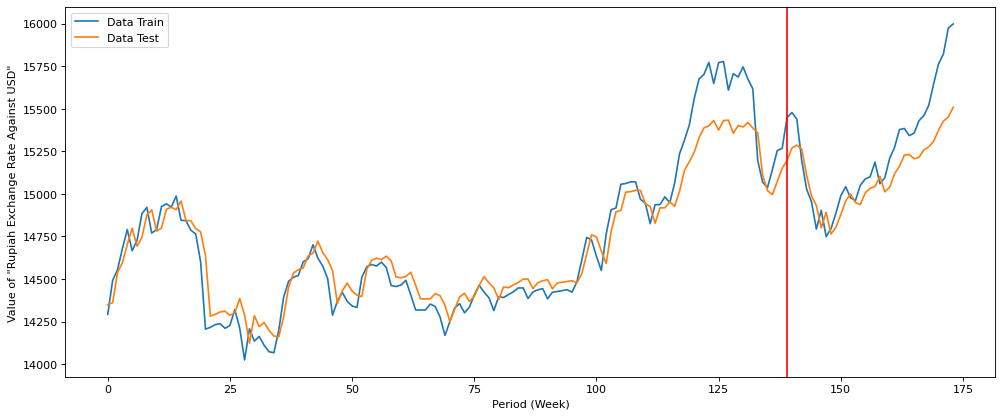

In [ ]:
#EPOCH 75
# Metode = LSTM
# Activation = "tanh", pilihannnya : 'tanh','sigmoid','relu'
# Nilai yang dapat diubah : hidden_units=50, epochs=100, batch_size=32,verbose=2
train_data, test_data, data = get_train_test("https://raw.githubusercontent.com/imomenujung/MPDW/main/Tugas%20Akhir/data176.csv",split_percent=0.8)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)
model = create_LSTM(hidden_units=50, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=75, batch_size=32, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)

MAPE_train_LSTM = mean_absolute_percentage_error(scaler.inverse_transform(trainY.reshape(-1,1)), scaler.inverse_transform(train_predict))
MAPE_test_LSTM = mean_absolute_percentage_error(scaler.inverse_transform(testY.reshape(-1,1)), scaler.inverse_transform(test_predict.reshape(-1,1)))

print(f"MAPE_train_LSTM = {round(MAPE_train_LSTM * 100,2)} %")
print(f"MAPE_test_LSTM = {round(MAPE_test_LSTM * 100,2)} %")

plot_result(scaler.inverse_transform(trainY.reshape(-1,1)), scaler.inverse_transform(testY.reshape(-1,1)), scaler.inverse_transform(train_predict.reshape(-1,1)), scaler.inverse_transform(test_predict.reshape(-1,1)))

Epoch 1/100
5/5 - 1s - loss: 0.2043 - 1s/epoch - 281ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1862 - 10ms/epoch - 2ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1693 - 11ms/epoch - 2ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1539 - 10ms/epoch - 2ms/step
Epoch 5/100
5/5 - 0s - loss: 0.1391 - 12ms/epoch - 2ms/step
Epoch 6/100
5/5 - 0s - loss: 0.1255 - 11ms/epoch - 2ms/step
Epoch 7/100
5/5 - 0s - loss: 0.1136 - 11ms/epoch - 2ms/step
Epoch 8/100
5/5 - 0s - loss: 0.1018 - 11ms/epoch - 2ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0913 - 11ms/epoch - 2ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0818 - 11ms/epoch - 2ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0729 - 11ms/epoch - 2ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0653 - 11ms/epoch - 2ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0586 - 11ms/epoch - 2ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0526 - 12ms/epoch - 2ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0480 - 10ms/epoch - 2ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0444 - 15ms/epoch - 3ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0

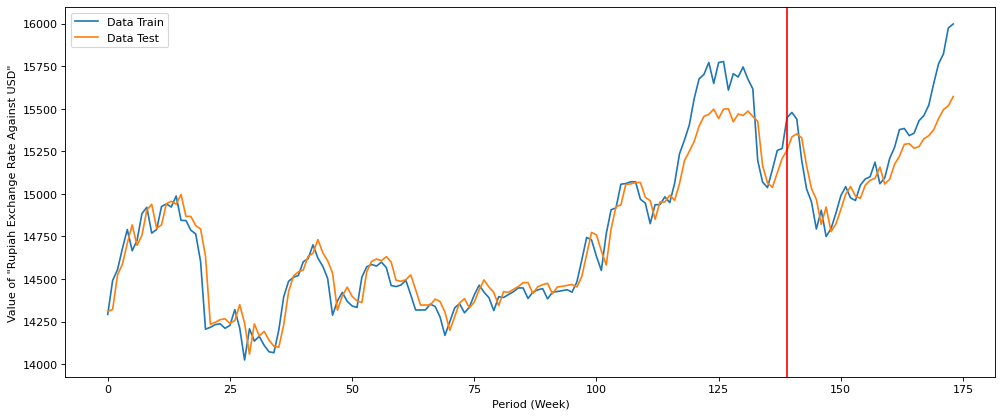

In [ ]:
#EPOCH 100
# Metode = LSTM
# Activation = "tanh", pilihannnya : 'tanh','sigmoid','relu'
# Nilai yang dapat diubah : hidden_units=50, epochs=100, batch_size=32,verbose=2
train_data, test_data, data = get_train_test("https://raw.githubusercontent.com/imomenujung/MPDW/main/Tugas%20Akhir/data176.csv",split_percent=0.8)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)
model = create_LSTM(hidden_units=50, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)

MAPE_train_LSTM = mean_absolute_percentage_error(scaler.inverse_transform(trainY.reshape(-1,1)), scaler.inverse_transform(train_predict))
MAPE_test_LSTM = mean_absolute_percentage_error(scaler.inverse_transform(testY.reshape(-1,1)), scaler.inverse_transform(test_predict.reshape(-1,1)))

print(f"MAPE_train_LSTM = {round(MAPE_train_LSTM * 100,2)} %")
print(f"MAPE_test_LSTM = {round(MAPE_test_LSTM * 100,2)} %")

plot_result(scaler.inverse_transform(trainY.reshape(-1,1)), scaler.inverse_transform(testY.reshape(-1,1)), scaler.inverse_transform(train_predict.reshape(-1,1)), scaler.inverse_transform(test_predict.reshape(-1,1)))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN
import matplotlib.pyplot as plt

# Prediksi 10 Periode ke depan

1/1 [==============================] - 0s 15ms/step


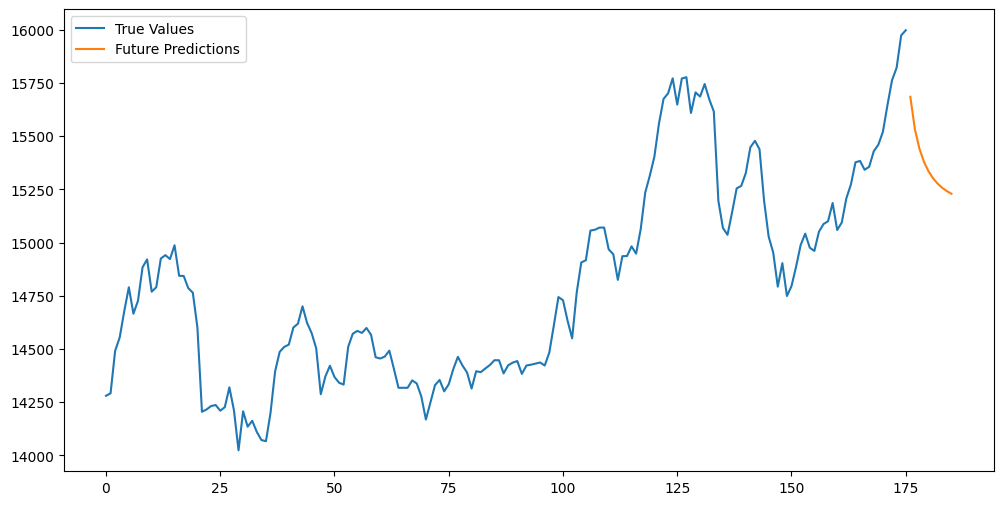

In [ ]:
target = df['Average_Kurs'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler.fit_transform(target)

# Predict future values
future_steps = 10  # Set the number of future steps you want to predict
future_data = scaled_target[-time_steps:, :]

future_predictions = []
for _ in range(future_steps):
    # Reshape the data to match the input shape of the model
    future_input = future_data.reshape((1, time_steps, 1))

    # Make the prediction
    future_pred = model.predict(future_input)

    # Append the prediction to the results
    future_predictions.append(future_pred[0, 0])

    # Update the input data for the next prediction
    future_data = np.vstack((future_data[1:], future_pred))

# Inverse transPilar Ekonomi Sejahtera untuk Kemajuan sejarah Indonesiaform the predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(target, label='True Values')
plt.plot(np.arange(len(target) , len(target) + future_steps), future_predictions, label='Future Predictions')
plt.legend()
plt.show()

### Peramalan dengan Grafik lebih Rapi

In [ ]:
pred = pd.read_csv("https://raw.githubusercontent.com/imomenujung/MPDW/main/Tugas%20Akhir/data176prediksi.csv", sep=",")
pred.head()

,Week,Average_Kurs
0,6/14/2020,14280.0
1,6/21/2020,14291.8
2,6/28/2020,14491.2
3,7/5/2020,14554.4
4,7/12/2020,14678.2


In [ ]:
pred.iloc[184:186,:]

,Week,Average_Kurs
184,12/31/2023,15325.851
185,1/7/2024,15316.900


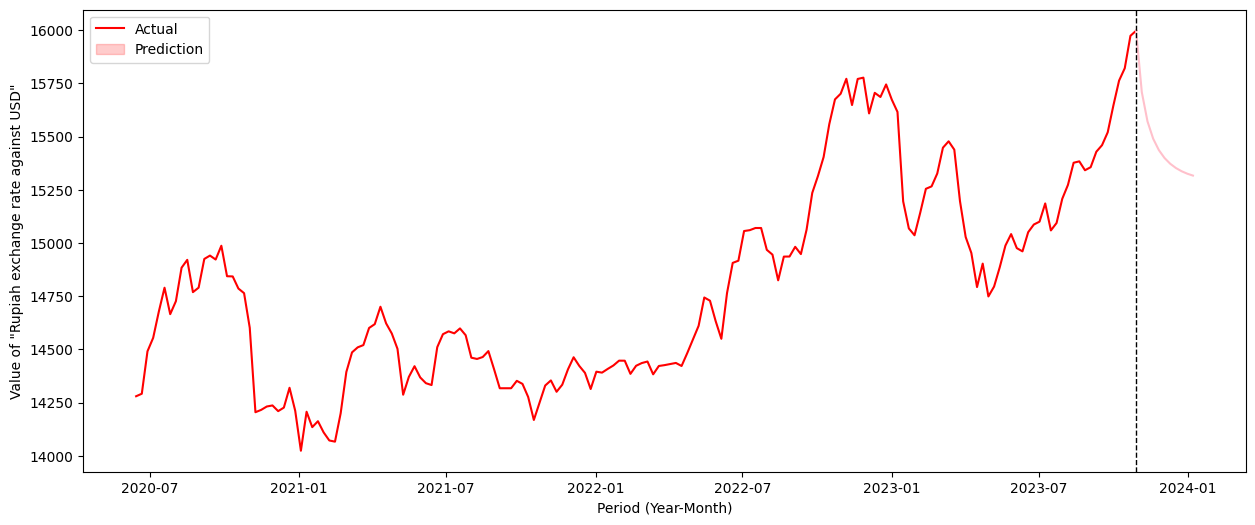

In [ ]:
pred_train = pred.iloc[:176,:]
pred_test = pred.iloc[175:186,:]
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt

pred['Week'] = pd.to_datetime(pred['Week'], format = '%m/%d/%Y')
pred.head().style.set_properties(subset=['Week'], **{'background-color': 'dodgerblue'})
ax = plt.figure(figsize=(15, 6))
sns.lineplot(x=pred['Week'], y=pred_train['Average_Kurs'].fillna(method='ffill'), color='red')
sns.lineplot(x=pred['Week'], y=pred_test['Average_Kurs'].fillna(method='ffill'), color='pink')
plt.xlabel('Period (Year-Month)')
plt.ylabel('Value of "Rupiah exchange rate against USD"')
plt.legend(labels=['Actual', 'Prediction'])
# Define the x-coordinate where you want the vertical line
x_coord = pd.to_datetime("10/29/2023")

# Add the vertical line using axvline
plt.axvline(x=x_coord, color='black', linestyle='--', linewidth=1)

# Show the plot
plt.show()